Pitcher:  Jacob deGrom
Start Date:  pass
End Date:  pass


Gathering player lookup table. This may take a moment.
Gathering Player Data


            release_speed  release_spin_rate
pitch_type                                  
CH                   92.0             1601.0
CU                   83.0             2720.0
FF                  100.0             2433.0
SL                   91.0             2623.0


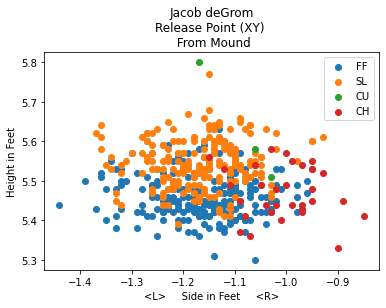

In [5]:
#######################################
# Pandas import and settings
import pandas as pd
pd.set_option('display.max_columns', None)

# matplotlib inport
import matplotlib.pyplot as plt

# baseball scraper import
import baseball_scraper as bs
from baseball_scraper import statcast
from baseball_scraper import playerid_lookup
from baseball_scraper import statcast_pitcher


#######################################
# coloumn names for simplicity sake
# find a better way to do this
pitcher = 'player_name'
tagged = 'pitch_type'
velo = 'release_speed'
spin = 'release_spin_rate'
rel_side = 'release_pos_x'
rel_height = 'release_pos_z'

# select pitcher and timeframe for analysis
full_name = input('Pitcher: ')
start_date = input('Start Date: ')
end_date = input('End Date: ')

### shortcut because im lazy in testing ###
### make sure to remove this once you are done ###
if start_date == 'pass':
    start_date = '2021-06-01'
if end_date == 'pass':
    end_date = '2021-07-01'
    
# create first and last name from input full name
first_name = full_name.split()[0]
last_name =full_name.split()[-1]

# run the baseball_scraper to create the data frame & save as DF
key_id = int(playerid_lookup(last_name, first_name)['key_mlbam'])
df = statcast_pitcher(start_date, end_date, key_id)

# Create summary statistics
summary_stats = round(df.groupby([tagged])[[velo, spin]].mean())
print('\n ======= \n')
print(summary_stats)

# Release Point plot
# consider using 2*2 plot instead of one large plot?
df_pitches = df[tagged].unique().tolist()
for pitch in df_pitches:
    rel_pitch = df[df[tagged].str.contains(pitch)]
    plt.scatter(rel_pitch[rel_side], rel_pitch[rel_height], label=pitch)
    plt.xlabel('<L>     Side in Feet     <R>')
    plt.ylabel('Height in Feet')
    plt.title(full_name + '\nRelease Point (XY) \n From Mound')
    plt.legend()
plt.show()